# Analysis of Citation Graphs #
## Xiangzhu Long ##

### How do scientific papers get cited? ###

Our task for this application is to analyze the structure of graphs generated by citation patterns from scientific papers. Each scientific paper cites many other papers, say 20-40, and sometimes (e.g., review papers) hundreds of other papers. But, let's face it: It is often the case that the authors of a paper are superficially familiar with some (many?) of the papers they cite. So, the question is: Are the cited papers chosen randomly (from within the domain of the paper) or is there some "hidden pattern"?

Given that we will be looking at "paper i cites paper j" relationships, it makes sense to represent the citation data as a directed graph (a citation graph) in which the nodes correspond to papers, and there is an edge from node i to node j if the paper corresponding to node i cites the paper corresponding to node j. Since we're interested in understanding how papers get cited, we will analyze the in-degree distribution of a specific graph, and contrast it to those of graphs generated by two different random processes.

### Question 1 ###
Load a provided [citation graph](http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt) for 27,770 high energy physics theory papers. This graph has 352,768 edges.

Compute the in-degree distribution for this citation graph, normalize the distribution, and then compute a log/log plot of the points in this normalized distribution. 

(Nodes with in-degree zero can be ignored when computing the log/log plot since log(0)=−∞.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib2

In [2]:
def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

In [3]:
def compute_in_degrees(digraph):
    """
    computes the in-degrees for the nodes in the graph
    """
    in_degree = {}
    for key in digraph:
        in_degree[key] = 0
    
    for key in in_degree:
        for direct in digraph[key]:
            in_degree[direct] += 1
    
    return in_degree

In [4]:
def in_degree_distribution(digraph):
    """
    computes the unnormalized distribution of the in-degrees of 
    the graph. 
    """
    in_degree = compute_in_degrees(digraph)
    degree_distribution = {}
    
    for key in in_degree:
        length = in_degree[key]
        if length in degree_distribution:
            degree_distribution[length] += 1
        else:
            degree_distribution[length] = 1
    
    return degree_distribution

In [5]:
def in_degree_distribution_normalized(digraph):
    """
    computes the normalized distribution of the in-degrees of 
    the graph. 
    """
    degree_distribution = in_degree_distribution(digraph)
    
    count = sum(degree_distribution.values())
#     print "count", count
    
    for element in degree_distribution.keys():
        degree_distribution[element] = float(degree_distribution[element]) / float(count)
        
    if degree_distribution.has_key(0):
        degree_distribution.pop(0)
        
    return degree_distribution 

In [6]:
NETWORK_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_phys-cite.txt"
digraph = load_graph(NETWORK_URL)
degree_distribution = in_degree_distribution_normalized(digraph)
# print degree_distribution

Loaded graph with 27770 nodes


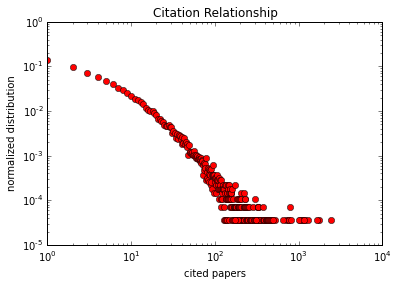

In [7]:
plt.loglog(degree_distribution.keys(), degree_distribution.values(), 'ro')
plt.title("Citation Relationship")
plt.xlabel("cited papers")
plt.ylabel("normalized distribution")
plt.show()

### Question 2 ###

Algorithm ER is to generate random graphs. Consider the simple modification of the algorithm to generate random directed graphs: For every ordered pair of distinct nodes (i,j), the modified algorithm adds the directed edge from i to j with probability p.

Consider the shape of the in-degree distribution for an ER graph and compare its shape to that of the physics citation graph. 

Once you have determined the shape of the in-degree distributions for ER graphs, compare the shape of this distribution to the shape of the in-degree distribution for the citation graph.

1.Is the expected in-degree the same for every node in an ER graph?

Yes. The ER algorithm treats each node in the graph in the same manner, the expected in-degree of any node is n*p. 

2.What does the in-degree distribution for an ER graph look like? You may either provide a plot (linear or log/log) of the degree distribution for a small value of n or a short written description of the shape of the distribution.

As noted in the Homework, the in-degree of an arbitrary node in a directed ER graph is binomially distributed. Therefore, the in-degree distribution for the entire graph must also be binomial.

3.Does the shape of the in-degree distribution plot for ER look similar to the shape of the in-degree distribution for the citation graph? Provide a short explanation of the similarities or differences. Focus on comparing the shape of the two plots as discussed in the class page on "Creating, formatting, and comparing plots".

No. The two distributions are not similar. The in-degree distributions for ER graphs are binomial (bump-shaped) and are substantially different from the linear shape of in-degree distributions for citation graphs.

*Conclusion:* Citation graphs are not generated by a purely random process. If they were, we would expect the in-degree distribution for the citation graph to be similar to the in-degree distribution for the ER graphs. However, the distributions for ER graphs are binomial (bump-shaped) while the distribution for the citation graph is almost linear.

In [8]:
import random
def randomDigraph(num_nodes, prob):
    '''
    Generate a digraph with num_nodes nodes.
    Edge exists given probability prob
    '''  
    keys = range(0, num_nodes)
    digraph = dict.fromkeys(keys)
    for node_i in range(0, num_nodes):
        for node_j in range(0, num_nodes):
            rand = random.uniform(0, 1)
            if node_i != node_j and rand < prob:
                if digraph[node_i] == None:
                    digraph[node_i] = set([node_j])
                else:    
                    digraph[node_i].add(node_j)
    # remove empty values
    digraph_new = dict((k, v) for k, v in digraph.iteritems() if v)
    return digraph_new

In [9]:
random_digraph = randomDigraph(27770, 0.0005)
randig_degree_distribution = in_degree_distribution_normalized(random_digraph)

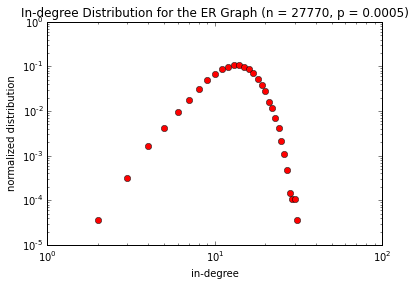

In [10]:
plt.loglog(randig_degree_distribution.keys(), randig_degree_distribution.values(), 'ro')
plt.title("In-degree Distribution for the ER Graph (n = 27770, p = 0.0005)")
plt.xlabel("in-degree")
plt.ylabel("normalized distribution")
plt.show()

## Question 3 ##

We next consider a different process for generating synthetic directed graphs. In this process, a random directed graph is generated iteratively, where in each iteration a new node is created, added to the graph, and connected to a subset of the existing nodes. This subset is chosen based on the in-degrees of the existing nodes. More formally, to generate a random directed graph in this process, the user must specify two parameters: n, which is the final number of nodes, and m (where m≤n), which is the number of existing nodes to which a new node is connected during each iteration. Notice that m is fixed throughout the procedure.

The algorithm starts by creating a complete directed graph on m nodes. Then, the algorithm grows the graph by adding n−m nodes, where each new node is connected to m nodes randomly chosen from the set of existing nodes. As an existing node may be chosen more than once in an iteration, we eliminate duplicates (to avoid parallel edges); hence, the new node may be connected to fewer than m existing nodes upon its addition.

The full description of the algorithm for generating random directed graphs with this process is given below, and is called Algorithm DPA (note that the m in the input is a parameter that is specified to this algorithm, and it does not denote the total number of edges in the resulting graph). The notation ∑x∈Sx means the "sum of all elements x in set S." For example, if S={1,7,12}, then ∑x∈Sx≡1+7+12=20.

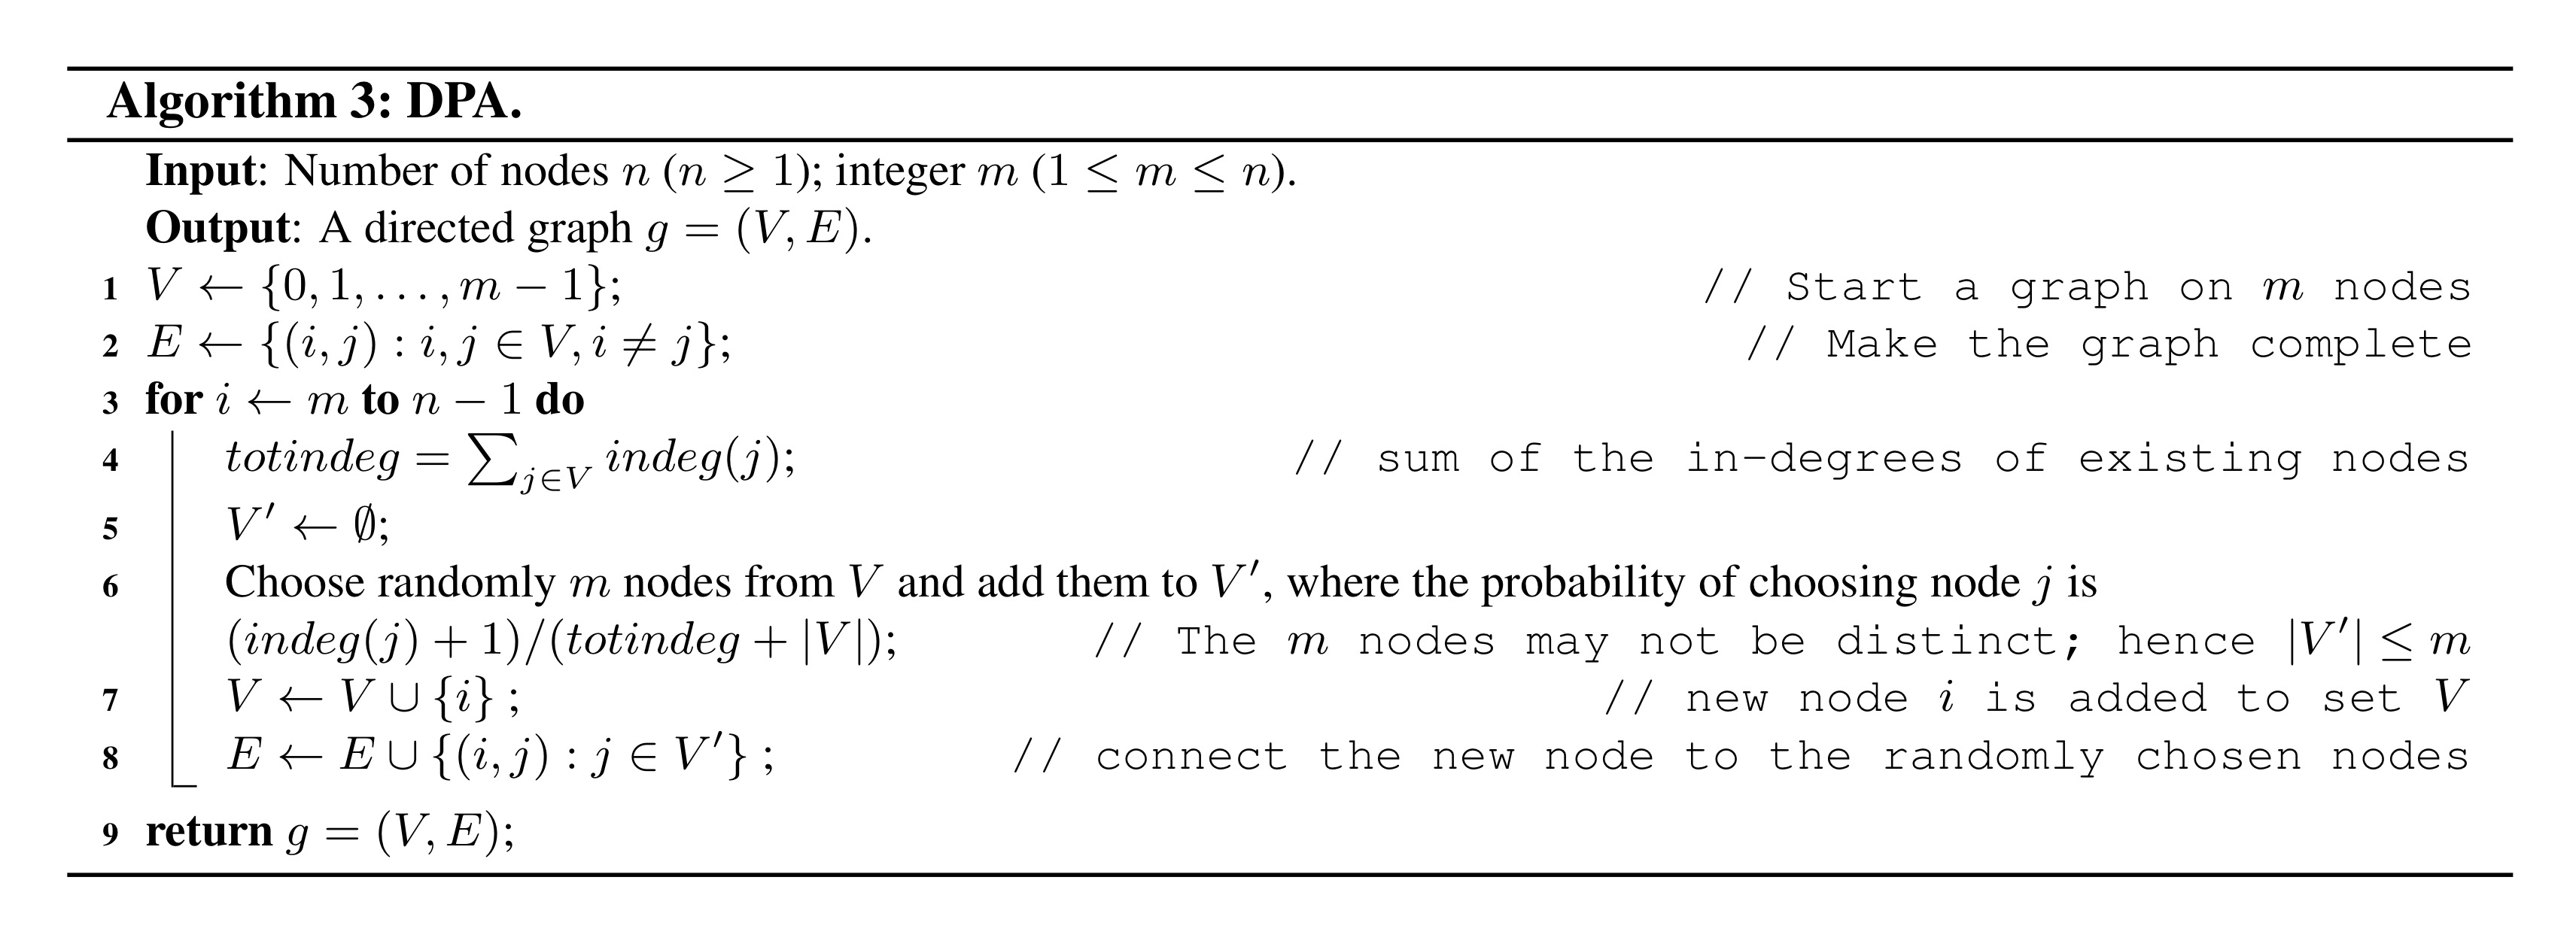

In [11]:
from IPython.display import Image
Image(filename="DPA.jpg", width=750, height=400)

Notice that this algorithm is more complex than the ER algorithm. As a result, reasoning about the properties of the graphs that it generates analytically is not as simple. When such a scenario arises, we can implement the algorithm, run it, produce graphs, and visually inspect their in-degree distributions. In general, this is a powerful technique: When analytical solutions to systems are very hard to derive, we can simulate the systems and generate data that can be analyzed to understand the properties of the systems. 

For this question, we will choose values for n and m that yield a DPA graph whose number of nodes and edges is roughly the same to those of the citation graph. For the nodes, choosing n to be the number of nodes as the citation graph is easy. Since each step in the DPA algorithm adds m edges to the graph, a good choice for m is an integer that is close to the average out-degree of the physics citation graph.

Provide numerical values for n and m that used in the construction of the DPA graph.

The value of n is the number of papers in the citation graph, which is 27770. 

The citation graph has 352768 total edges and 27770 total nodes. So the average out-degree is approximately 12.7. Since the value of m must be an integer, the answer may be rounded either up of down to the nearest integer. So, m=12 or m=13.  

In [12]:
NUM_NODES = 27770
NUM_OUT_DEGREE = 13

## Question 4 ##

Implement the DPA algorithm, compute a DPA graph, and then plot the in-degree distribution for this DPA graph. 

In [13]:
class DPATrial:
    """
    Simple class to encapsulate optimized trials for DPA algorithm
    
    Maintains a list of node numbers with multiple instances of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    """

    def __init__(self, num_nodes):
        """
        Initialize a DPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_node trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that the number of instances of
        each node number is in the same ratio as the desired probabilities
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for dummy_idx in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

In [14]:
def make_complete_graph(num_nodes):
    """
    returns a dictionary corresponding to a complete directed graph 
    with the specified number of nodes. 
    """
    complete_graph = {}
    
    for node in range(num_nodes):
        node_set = set()
        for base_node in range(num_nodes):
            node_set.add(base_node)
        node_set.remove(node)
        complete_graph[node] = node_set
    
    return complete_graph

In [15]:
def DPA_graph(n, m):
    '''
    generate a random digraph
    n: total number of nodes in the output graph
    m: number of nodes in the start_graph (a complete digraph)
    output: a DPA digraph with n nodes
    '''
    graphV = make_complete_graph(m)
    graphDPA = DPATrial(m)
    
    for i in range(m, n):
        new_neighbors = graphDPA.run_trial(m)
        graphV[i] = new_neighbors
        
    return graphV

In [16]:
DPA_graph =  DPA_graph(NUM_NODES, NUM_OUT_DEGREE)
in_degree_DPA = in_degree_distribution_normalized(DPA_graph)

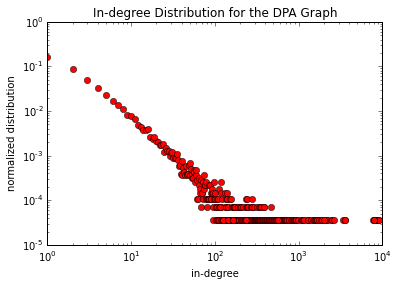

In [17]:
plt.loglog(in_degree_DPA.keys(), in_degree_DPA.values(), 'ro')
plt.title("In-degree Distribution for the DPA Graph")
plt.xlabel("in-degree")
plt.ylabel("normalized distribution")
plt.show()

## Question 5 ##

Compare the in-degree distribution for the citation graph to the in-degree distribution for the DPA graph as constructed in Question 4. In particular, we will consider whether the shape of these two distributions are similar and, if they are similar, what might be the cause of the similarity.

To help the analysis, consider the following three phenomena:
The "six degrees of separation" phenomenon,
The "rich gets richer" phenomenon, and
The "Hierarchical structure of networks" phenomenon.

Consider how one of these phenomena might explain the structure of the citation graph or, alternatively, how the citations patterns follow one of these phenomena. 

1.Is the plot of the in-degree distribution for the DPA graph similar to that of the citation graph? 

The plot of the in-degree distribution of the DPA graph is indeed similar to that of the citation graph. They agree on all of the items listed in item c for Question 1. In particular, the points in both plots are accurately approximated by a line with falling (negative) slope. In both cases, the points tend to scatter more as the fraction of points (papers) decreases.

2.Which one of the three social phenomena listed above mimics the behavior of the DPA process? Provide a short explanation for your answer.

The correct phenomenon is the "rich gets richer". In Algorithm DPA, a node with a higher degree (rich) has a higher probability of getting a new edge (richer). This process modeled by Algorithm DPA mimics the rich gets richer model, but is also used to explain the six degrees of separation phenomenon. Therefore, for this item, also give credit to answers that cite the "six degrees of separation."

3.Could one of these phenomena explain the structure of the physics citation graph? 

The "Rich get richer" phenomenon provides an explanation for the structure of the citation graph. Papers (nodes) that have lots of citations (incoming edges) are more visible and, therefore, more likely to draw new citations (incoming edges) due to their visibility.

*Conclusion:* In general, the in-degree distribution for citation graphs follows the power law which captures the statistical behavior of many types of phenomena. Distributions following the power law are well-approximated by an expression of the form kα where k is the free variable.

Note that the in-degree distribution for the citation graphs follows the power law (with α<0) since the log/log plot is nearly linear. As observed in the class notes on "Logs and exponentials", the value for α corresponds to the negative slope of a line that approximates the points in the plot.